# Feature engineering

**In this notebook, I will perform the following tasks**

* Drop any unnecessary columns
* Data imputation
* Feature selection
* Export final dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.imputation import RandomSampleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection


# Import dataset
dataset = pd.read_csv("C:/Users/steve/Desktop/Notebooks/Thesis-Project/Datasets/Raw/ADNI(Rawdata).csv")
dataset

,RID,Gender,Ageatscreening,Diagnosis,MMSE0m,HipsASMbaseline,HipsContrastbaseline,HipsCorelationbaseline,HipsVariancebaseline,HipsSumAveragebaseline,...,ERCsContrastbaseline,ERCsCorelationbaseline,ERCsVariancebaseline,ERCsSumAveragebaseline,ERCsSumVariancebaseline,ERCsEntropybaseline,ERCsClusterShadebaseline,ERCs_thicknessbaseline,ERCsVolumebaseline,HipposcampusVolumebaseline
0,3,0,81.3479,3,20.0,NaN,158.27,0.63,218.30,28.37,...,253.10,0.40,208.65,23.39,581.50,NaN,-2568.19,2.31,1176.0,3047.0
1,4,0,67.6904,1,27.0,0.06,147.64,0.55,173.64,44.72,...,220.88,0.48,215.70,33.74,641.90,3.33,4113.01,2.76,1942.0,3449.0
2,5,0,73.8027,0,29.0,0.10,199.66,0.55,222.27,41.18,...,220.37,0.54,232.18,29.18,708.36,2.87,-1388.41,3.18,2044.0,3441.0
3,8,1,84.5945,0,28.0,0.08,184.21,0.53,201.55,43.04,...,198.42,0.54,220.48,26.68,683.50,2.77,-2506.55,2.68,1959.0,2875.0
4,10,1,73.9726,3,24.0,0.11,233.02,0.48,229.88,39.46,...,196.55,0.53,210.63,26.60,645.95,2.72,-1164.02,2.64,1397.0,2700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1201,1,75.6411,3,26.0,0.18,173.84,0.59,215.04,33.84,...,281.15,0.37,222.73,27.94,609.75,2.84,-1924.49,1.94,1112.0,2705.0
604,1221,0,71.2712,3,21.0,0.22,174.02,0.58,211.07,30.56,...,224.78,0.47,205.49,27.36,597.20,2.77,1146.39,2.44,1526.0,2913.0
605,1248,1,79.8548,3,23.0,0.19,199.31,0.56,229.63,33.13,...,220.41,0.48,214.97,27.16,639.47,2.79,-919.84,1.99,1215.0,2273.0
606,1253,1,62.7452,3,24.0,0.05,142.05,0.50,147.12,46.21,...,217.38,0.51,220.55,32.54,664.84,3.09,5289.89,3.27,2321.0,3739.0


Lets visualize how many data points are we missing

<Axes: >

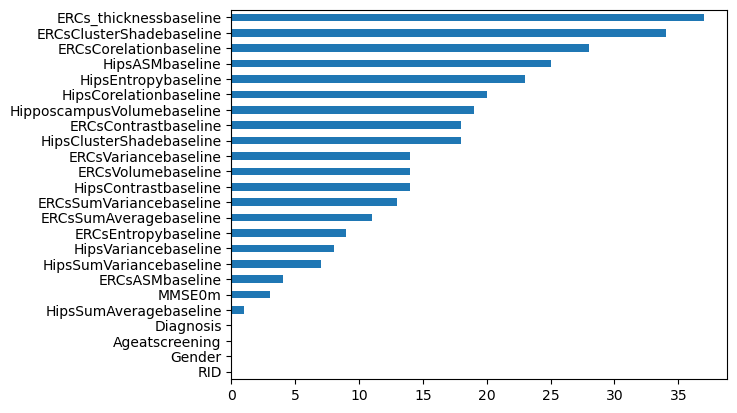

In [3]:
missing_data = dataset.isna().sum().sort_values()
missing_data.plot(kind='barh')

## Drop columns

We do miss quite a few. For starters, lets remove RID, Gender and Ageatscreening since these variables contribute little to none - as previously seen in our correlation matrix

In [4]:
dataset.drop(columns=["RID", "Gender", "Ageatscreening"], axis=1, inplace=True)

In [5]:
dataset.dtypes

Diagnosis                       int64
MMSE0m                        float64
HipsASMbaseline               float64
HipsContrastbaseline          float64
HipsCorelationbaseline        float64
HipsVariancebaseline          float64
HipsSumAveragebaseline        float64
HipsSumVariancebaseline       float64
HipsEntropybaseline           float64
HipsClusterShadebaseline      float64
ERCsASMbaseline               float64
ERCsContrastbaseline          float64
ERCsCorelationbaseline        float64
ERCsVariancebaseline          float64
ERCsSumAveragebaseline        float64
ERCsSumVariancebaseline       float64
ERCsEntropybaseline           float64
ERCsClusterShadebaseline      float64
ERCs_thicknessbaseline        float64
ERCsVolumebaseline            float64
HipposcampusVolumebaseline    float64
dtype: object

Perfect. Now lets move to imputing the dataset

## Data imputation

Random sampling imputation is in principle similar to mean, median, and mode imputation in that it considers that missing values should look like those already existing in the distribution.

Random sampling consists of taking random observations from the pool of available data and using them to replace the NA. In random sample imputation, we take as many random observations as missing values exist in the variable.

In both numerical and categorical variables, the distribution of the variable is preserved by sampling observations at random to replace missing data. 

**Assumptions**

Random sample imputation assumes that the data is missing completely at random. In this scenario, it makes sense to substitute the missing values with values extracted at random from the original distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, will be selected more often (because there are more of them to select from), but less frequent values will be selected as well. Thus, the distribution of the variables is preserved. 

In essence, we replace a population of missing values with a population of values with the same distribution of the original variable.

### Split the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop("Diagnosis", axis=1),  
    dataset["Diagnosis"],  
    test_size=0.3,  
    random_state=0,  
)

X_train_copy = X_train.copy()
X_test_copy = X_train.copy()

X_train.shape, X_test.shape

((425, 20), (183, 20))

In [7]:
imputer  = RandomSampleImputer(random_state=42)
imputer.fit(X_train)

RandomSampleImputer(random_state=42)

In [8]:
imputer.variables_

['MMSE0m',
 'HipsASMbaseline',
 'HipsContrastbaseline',
 'HipsCorelationbaseline',
 'HipsVariancebaseline',
 'HipsSumAveragebaseline',
 'HipsSumVariancebaseline',
 'HipsEntropybaseline',
 'HipsClusterShadebaseline',
 'ERCsASMbaseline',
 'ERCsContrastbaseline',
 'ERCsCorelationbaseline',
 'ERCsVariancebaseline',
 'ERCsSumAveragebaseline',
 'ERCsSumVariancebaseline',
 'ERCsEntropybaseline',
 'ERCsClusterShadebaseline',
 'ERCs_thicknessbaseline',
 'ERCsVolumebaseline',
 'HipposcampusVolumebaseline']

Great. lets see if our imputation method worked

In [9]:
X_train_t = imputer.transform(X_train)
X_test_t = imputer.transform(X_test)

X_train_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

In [10]:
X_test_t[imputer.variables_].isnull().sum()

MMSE0m                        0
HipsASMbaseline               0
HipsContrastbaseline          0
HipsCorelationbaseline        0
HipsVariancebaseline          0
HipsSumAveragebaseline        0
HipsSumVariancebaseline       0
HipsEntropybaseline           0
HipsClusterShadebaseline      0
ERCsASMbaseline               0
ERCsContrastbaseline          0
ERCsCorelationbaseline        0
ERCsVariancebaseline          0
ERCsSumAveragebaseline        0
ERCsSumVariancebaseline       0
ERCsEntropybaseline           0
ERCsClusterShadebaseline      0
ERCs_thicknessbaseline        0
ERCsVolumebaseline            0
HipposcampusVolumebaseline    0
dtype: int64

Lets have a look as to how our imputed dataset is currently affected compared to the original one

#### Visualizing the difference between the imputed train dataset and the original one

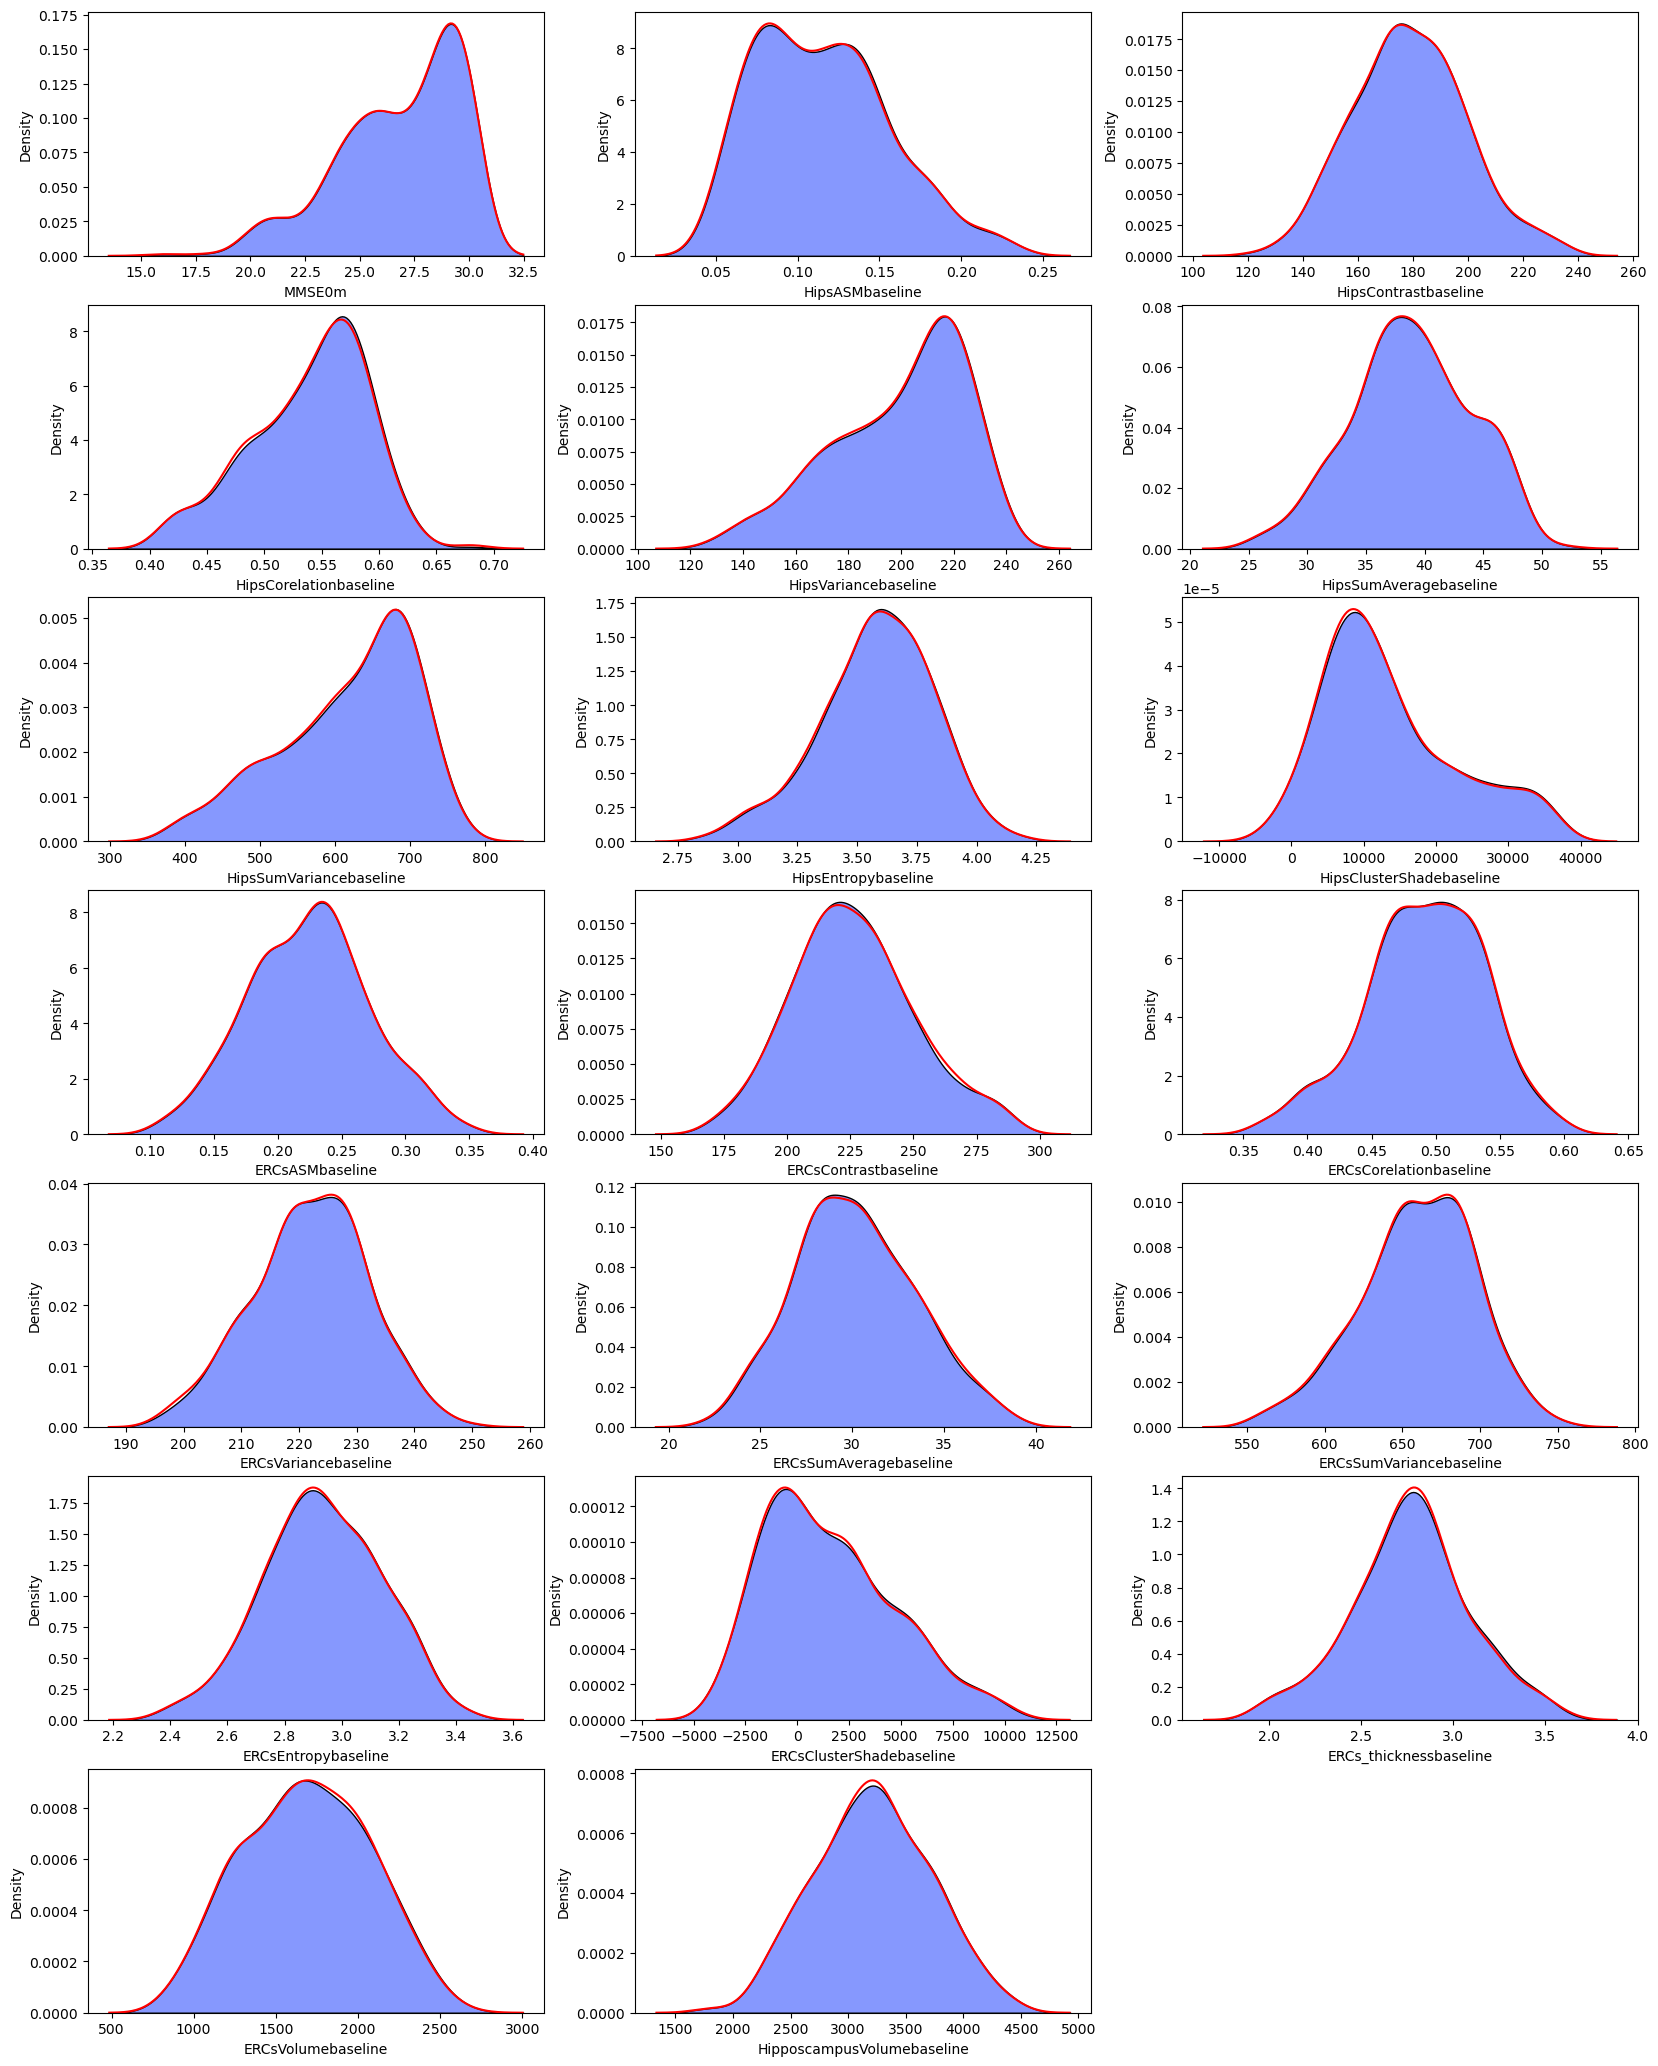

In [11]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_copy[X_train_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color= "red")

It appears that we have succesfuly preserved our original variance/normal distribution using out imputation method on our training set. How about we check the difference in our testing set?

#### Visualizing the difference between the imputed test dataset and the original one

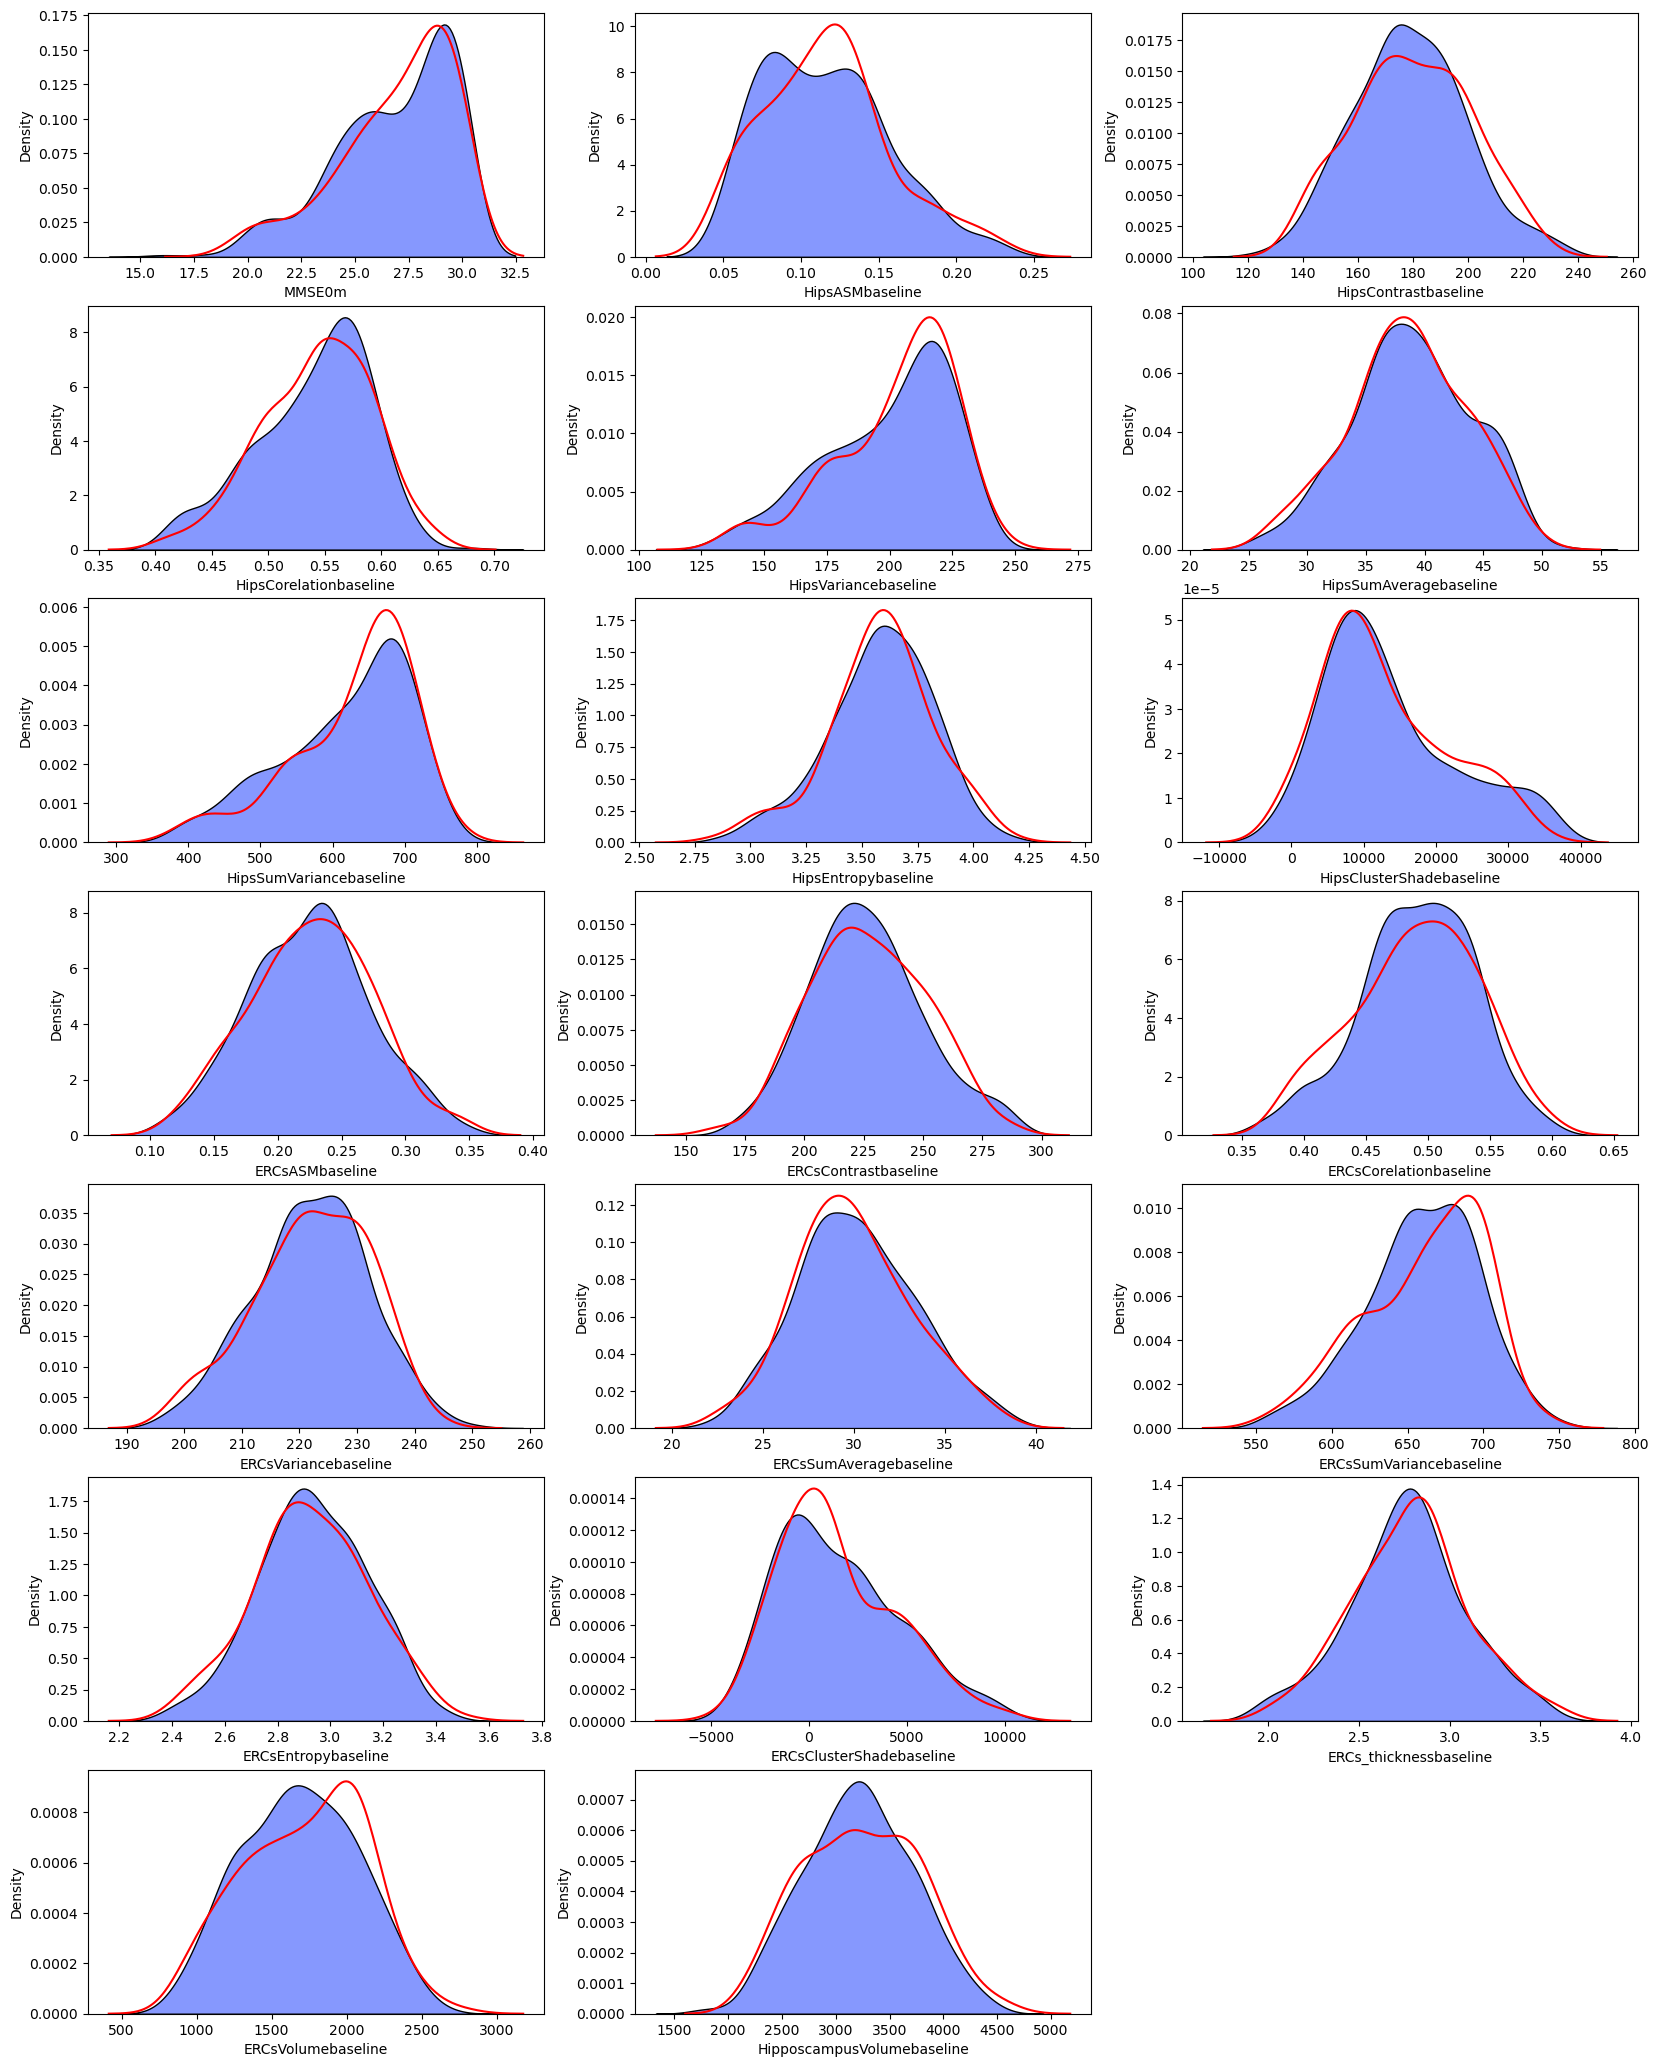

In [12]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_test_copy.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_copy[X_test_copy.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

It appears that in the testing set, the data imputation method has been affected a lot. How about we check the normal distribution of both the transformed train and test set?

#### Visualizing the difference between the imputed test and train dataset

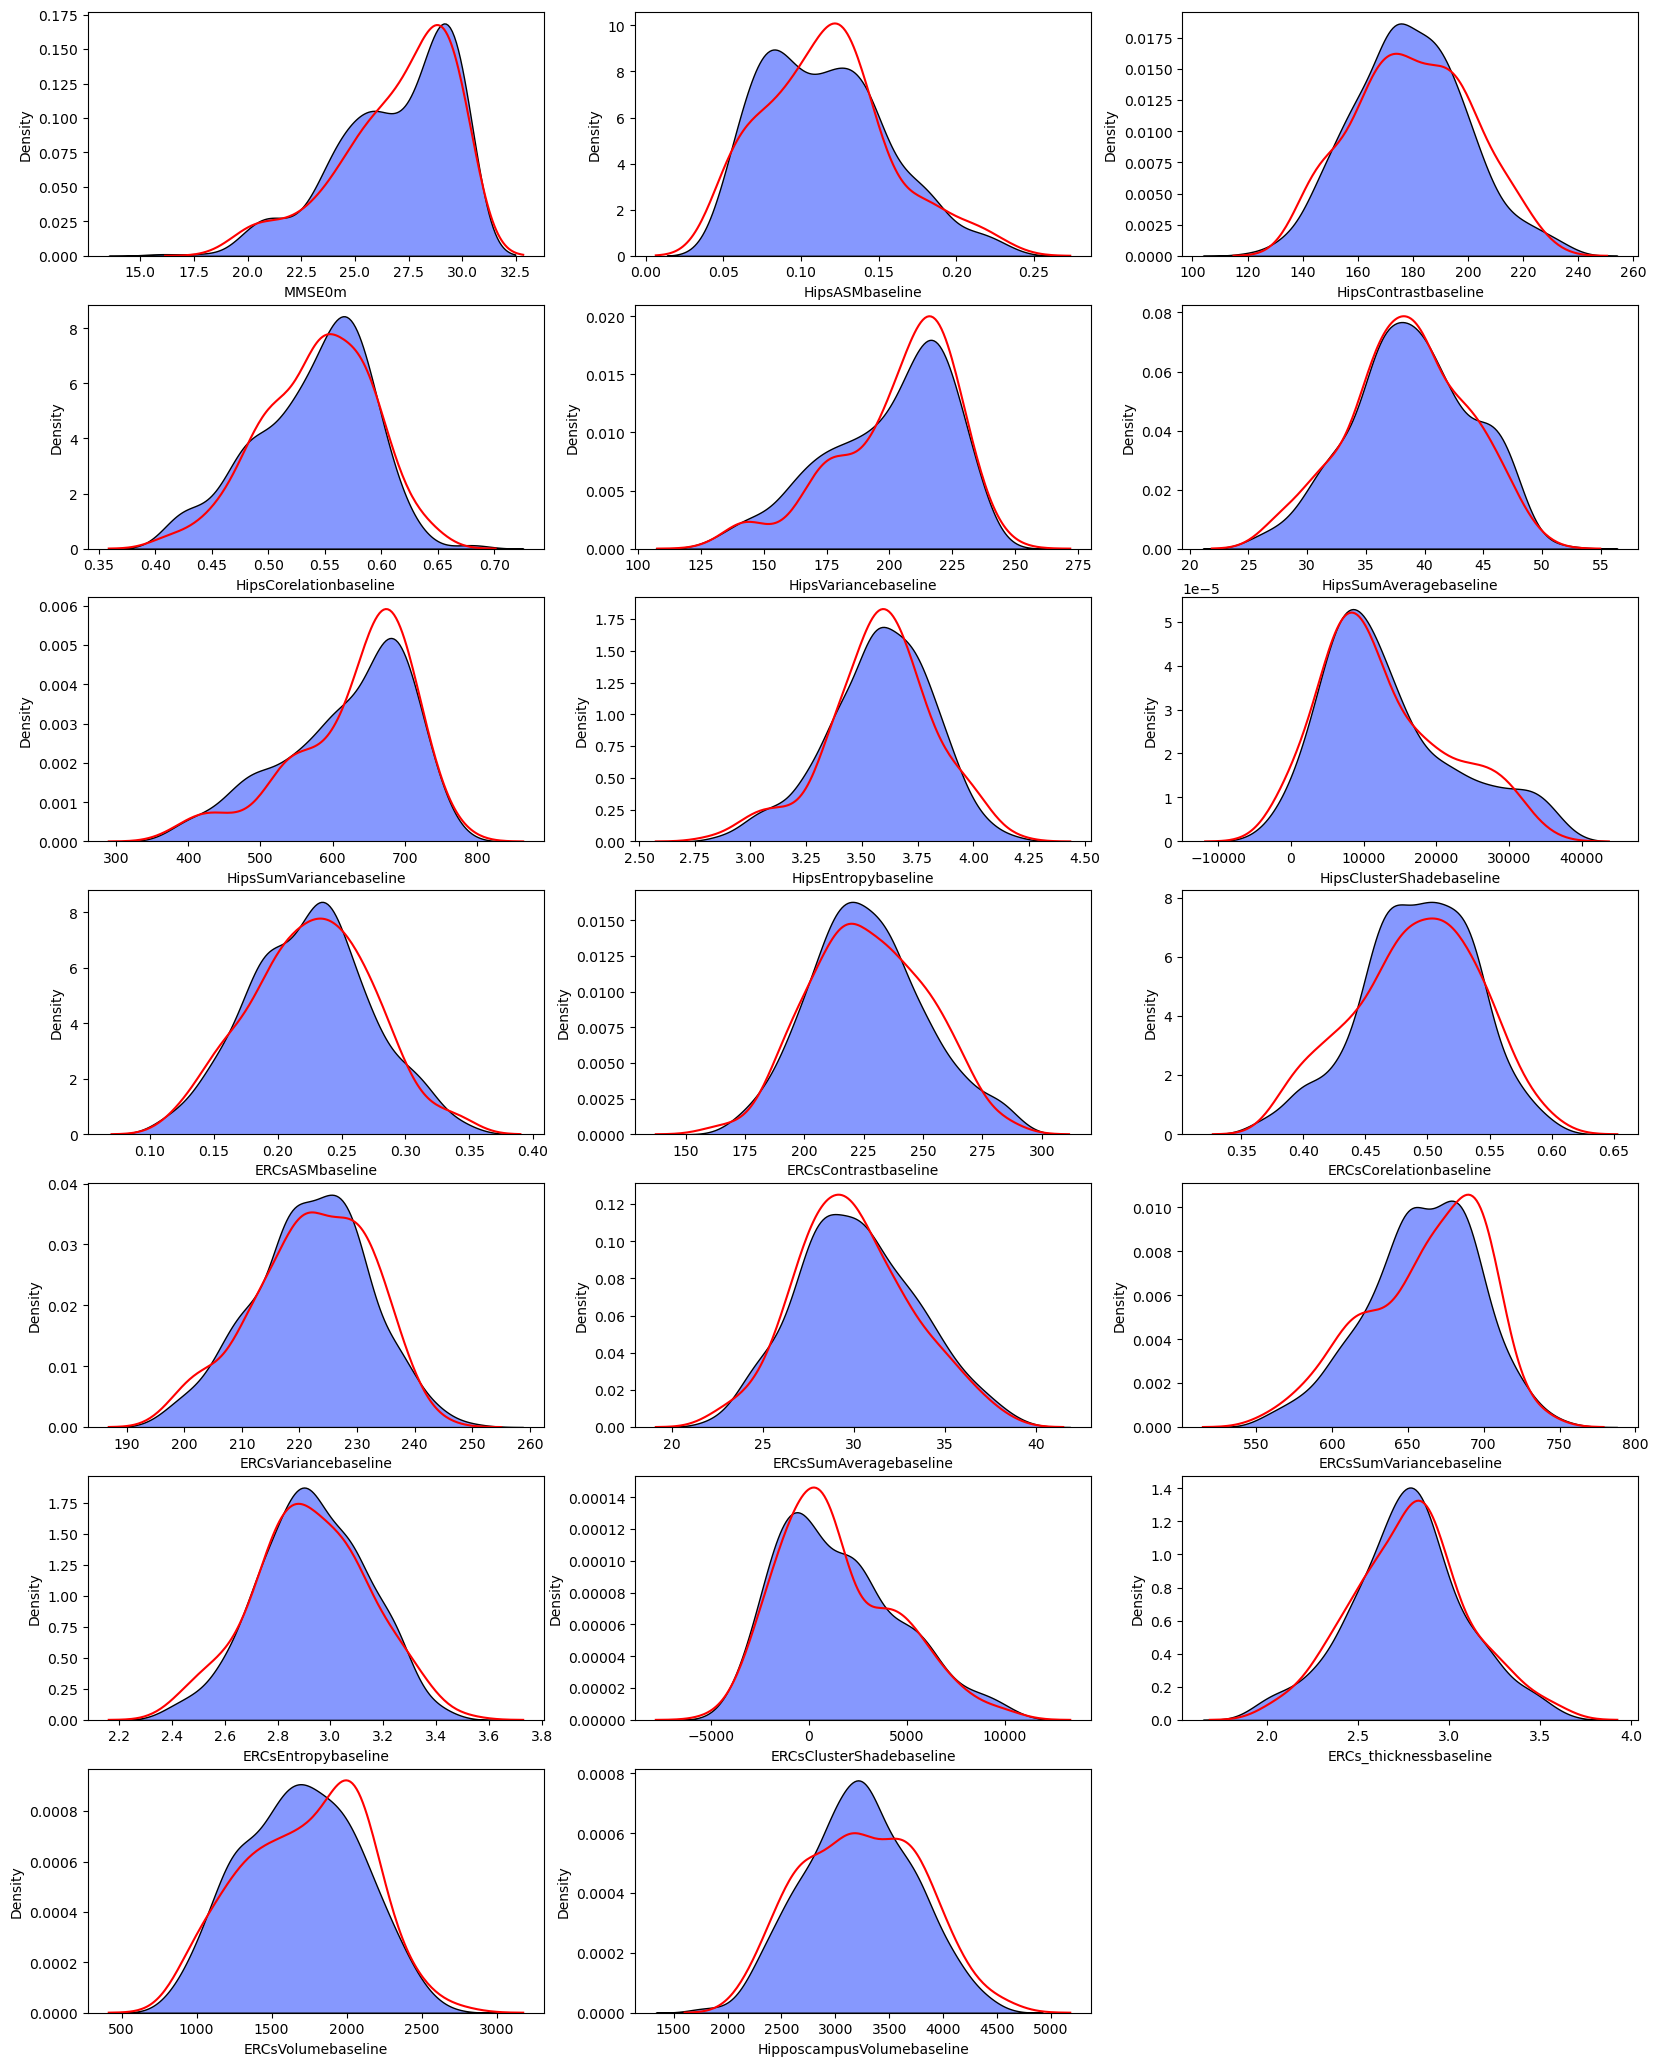

In [13]:
# Plot each column using histograms
plt.figure(figsize=(20, 45))

for i in range(len(X_train_t.columns)):
    plt.subplot(12,3,i+1)
    sns.kdeplot(X_train_t[X_train_t.columns[i]], color="#5e76fe", multiple="stack")

    plt.subplot(12,3,i+1)
    sns.kdeplot(X_test_t[X_test_t.columns[i]], color= "red")

Although we have not captured a perfect normal distribution after imputing, we will have to eventually choose a different imputation method? Like KNN - **to be implemeneted on the third iteration**

**Note**

I personally think that we dont have to apply variable transformation, since we have observed in our EDA notebook and above that most of our data is followig a normal distribution

# Feature selection

In [14]:
X_train_t.shape, X_test_t.shape

((425, 20), (183, 20))

In [15]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train_t)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [16]:
X_train = pipe.transform(X_train_t)
X_test = pipe.transform(X_test_t)

X_train.shape, X_test.shape

((425, 16), (183, 16))

In [17]:
X_train.columns

Index(['MMSE0m', 'HipsASMbaseline', 'HipsContrastbaseline',
       'HipsCorelationbaseline', 'HipsSumVariancebaseline',
       'HipsEntropybaseline', 'HipsClusterShadebaseline',
       'ERCsContrastbaseline', 'ERCsCorelationbaseline',
       'ERCsVariancebaseline', 'ERCsSumAveragebaseline',
       'ERCsSumVariancebaseline', 'ERCsClusterShadebaseline',
       'ERCs_thicknessbaseline', 'ERCsVolumebaseline',
       'HipposcampusVolumebaseline'],
      dtype='object')

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
    rf.fit(X_train, y_train)

    pred_train = rf.predict_proba(X_train)
    print(f'Random Forests roc-auc (train): {roc_auc_score(y_train, pred_train, multi_class="ovr", average="macro")}')

    pred_test = rf.predict_proba(X_test)
    print(f'Random Forests roc-auc (test): {roc_auc_score(y_test, pred_test, multi_class="ovr", average="macro")}')

In [19]:
# With feature selection
run_randomForests(X_train, X_test, y_train, y_test)

Random Forests roc-auc (train): 0.9458330215397982
Random Forests roc-auc (test): 0.8106248536391119


In [20]:
# With all features
run_randomForests(X_train_t, X_test_t, y_train, y_test)

Random Forests roc-auc (train): 0.9516378752991891
Random Forests roc-auc (test): 0.8149603460057331


# Exporting processed dataset

In [ ]:
X_train.to_csv('X_train_processed.csv', index=False)
X_test.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train_processed.csv', index=False)
y_test.to_csv('y_test_processed.csv', index=False)